# COM6018 - Assignment 1

Student Username: ` ACS23AB `

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [2]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')
print(df.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [3]:
# SOLUTION

import numpy as np
import matplotlib.pyplot as plt



## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

he dataset contains entries for countries grouped into four income groups: low, lower-middle, upper-middle and high. i) How have the total annual CO<sub>2</sub> emissions of each income group varied over the years 1950 to 2021? ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these groups varied over the same period. Comment on how the contribution of each income group is different when measured in terms of total emissions and per capita emissions.

(Add your solution below. Add further markdown and code cells as needed.)

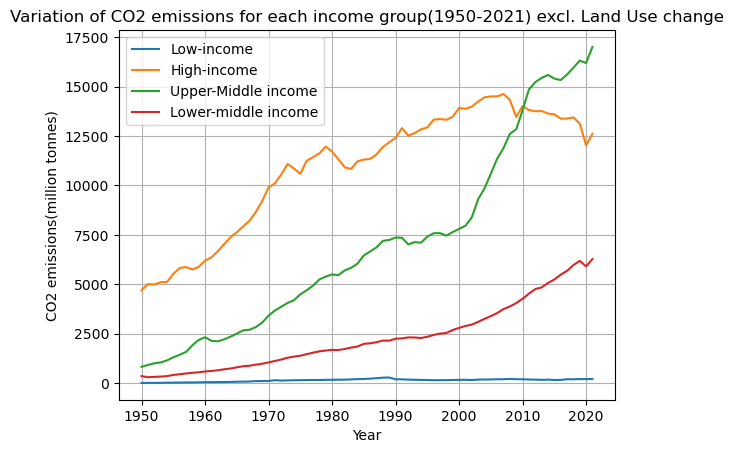

In [4]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.
low_df = df[(df['country'] == 'Low-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]
high_df = df[(df['country'] == 'High-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]
um_df = df[(df['country'] == 'Upper-middle-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]
lm_df = df[(df['country'] == 'Lower-middle-income countries') & (df['year'] >= 1950) & (df['year'] <= 2021)]

plt.plot(low_df['year'],low_df['co2'])
plt.plot(high_df['year'],high_df['co2'])
plt.plot(um_df['year'],um_df['co2'])
plt.plot(lm_df['year'],lm_df['co2'])
income_group = ['Low-income','High-income','Upper-Middle income','Lower-middle income']
plt.legend(income_group)
plt.xlabel('Year')
plt.ylabel('CO2 emissions(million tonnes)')
plt.title('Variation of CO2 emissions for each income group(1950-2021) excl. Land Use change')
plt.grid()


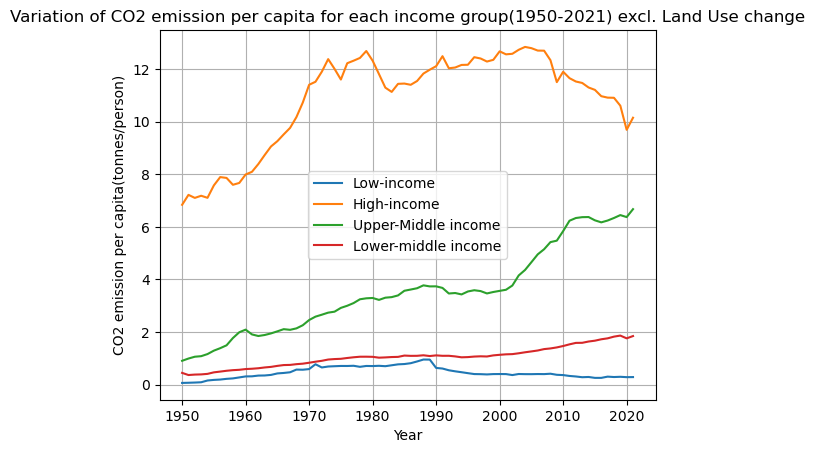

In [5]:
plt.plot(low_df['year'],low_df['co2_per_capita'])
plt.plot(high_df['year'],high_df['co2_per_capita'])
plt.plot(um_df['year'],um_df['co2_per_capita'])
plt.plot(lm_df['year'],lm_df['co2_per_capita'])
income_group = ['Low-income','High-income','Upper-Middle income','Lower-middle income']
plt.legend(income_group)
plt.xlabel('Year')
plt.ylabel('CO2 emission per capita(tonnes/person)')
plt.title('Variation of CO2 emission per capita for each income group(1950-2021) excl. Land Use change')
plt.grid()

## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Compare the share of global carbon emissions for the top 5 emitting countries as a proportion of the total world emissions. Make separate plots for the years 1960, 1990 and 2020. Make a similar set of plots but normalised in a way that accounts for the population of each country. Note, all the plots should appear in the same figure.

Comment on how the top 5 emitting countries have changed over time and how the top 5 emitting countries change when you normalise for population.

(Add your solution below. Add further markdown and code cells as needed.)

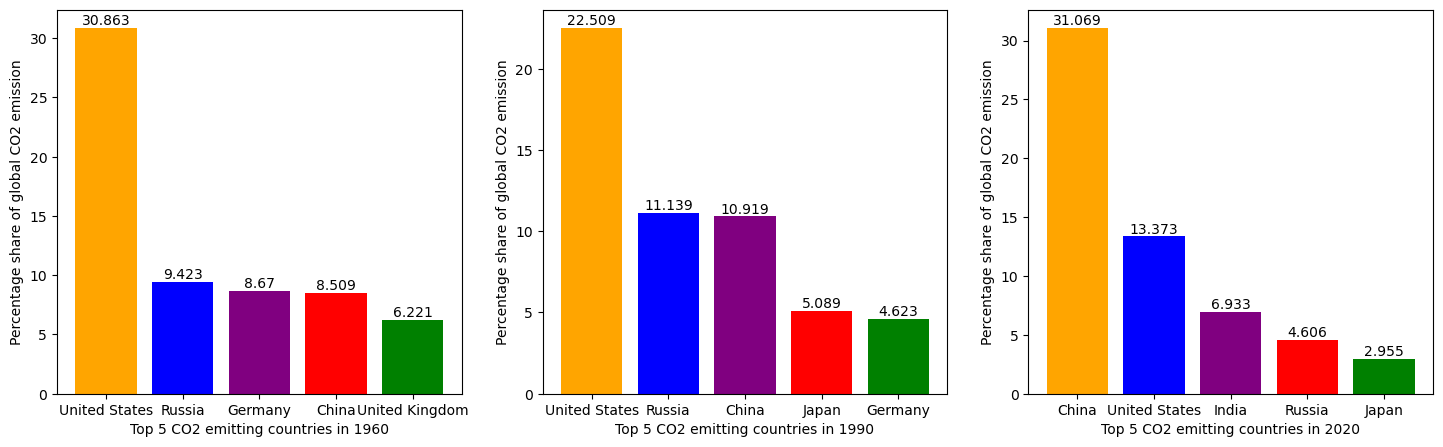

In [56]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.
df_1960 = df[df['year'] == 1960] #1960 dataframe
df_1960 = df_1960.dropna(subset=['iso_code'])
df_1960 = df_1960.sort_values('share_global_co2',ascending=False)
df_1990 = df[df['year'] == 1990] #1990 dataframe
df_1990 = df_1990.dropna(subset=['iso_code'])
df_1990 = df_1990.sort_values('share_global_co2',ascending=False)
df_2020 = df[df['year'] == 2020] #2020 dataframe
df_2020 = df_2020.dropna(subset=['iso_code'])
df_2020 = df_2020.sort_values('share_global_co2',ascending=False)

#1960-plot
color = ['orange', 'blue', 'purple', 'red', 'green']
plt.subplot(1,3,1)
plt.bar(df_1960.iloc[0:5]['country'],df_1960.iloc[0:5]['share_global_co2'],color = color)
for i in range(5):
    plt.text(df_1960.iloc[i]['country'],df_1960.iloc[i]['share_global_co2'],df_1960.iloc[i]['share_global_co2'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 CO2 emitting countries in 1960')
plt.ylabel('Percentage share of global CO2 emission')


#1990-plot
plt.subplot(1,3,2)
plt.bar(df_1990.iloc[0:5]['country'],df_1990.iloc[0:5]['share_global_co2'],color = color)
for i in range(5):
    plt.text(df_1990.iloc[i]['country'],df_1990.iloc[i]['share_global_co2'],df_1990.iloc[i]['share_global_co2'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 CO2 emitting countries in 1990')
plt.ylabel('Percentage share of global CO2 emission')

#2020-plot
plt.subplot(1,3,3)
plt.bar(df_2020.iloc[0:5]['country'],df_2020.iloc[0:5]['share_global_co2'],color = color)
for i in range(5):
    plt.text(df_2020.iloc[i]['country'],df_2020.iloc[i]['share_global_co2'],df_2020.iloc[i]['share_global_co2'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 CO2 emitting countries in 2020')
plt.ylabel('Percentage share of global CO2 emission')
plt.subplots_adjust(left=0.95, bottom=0.2, right=3.1, top=1)
plt.show()





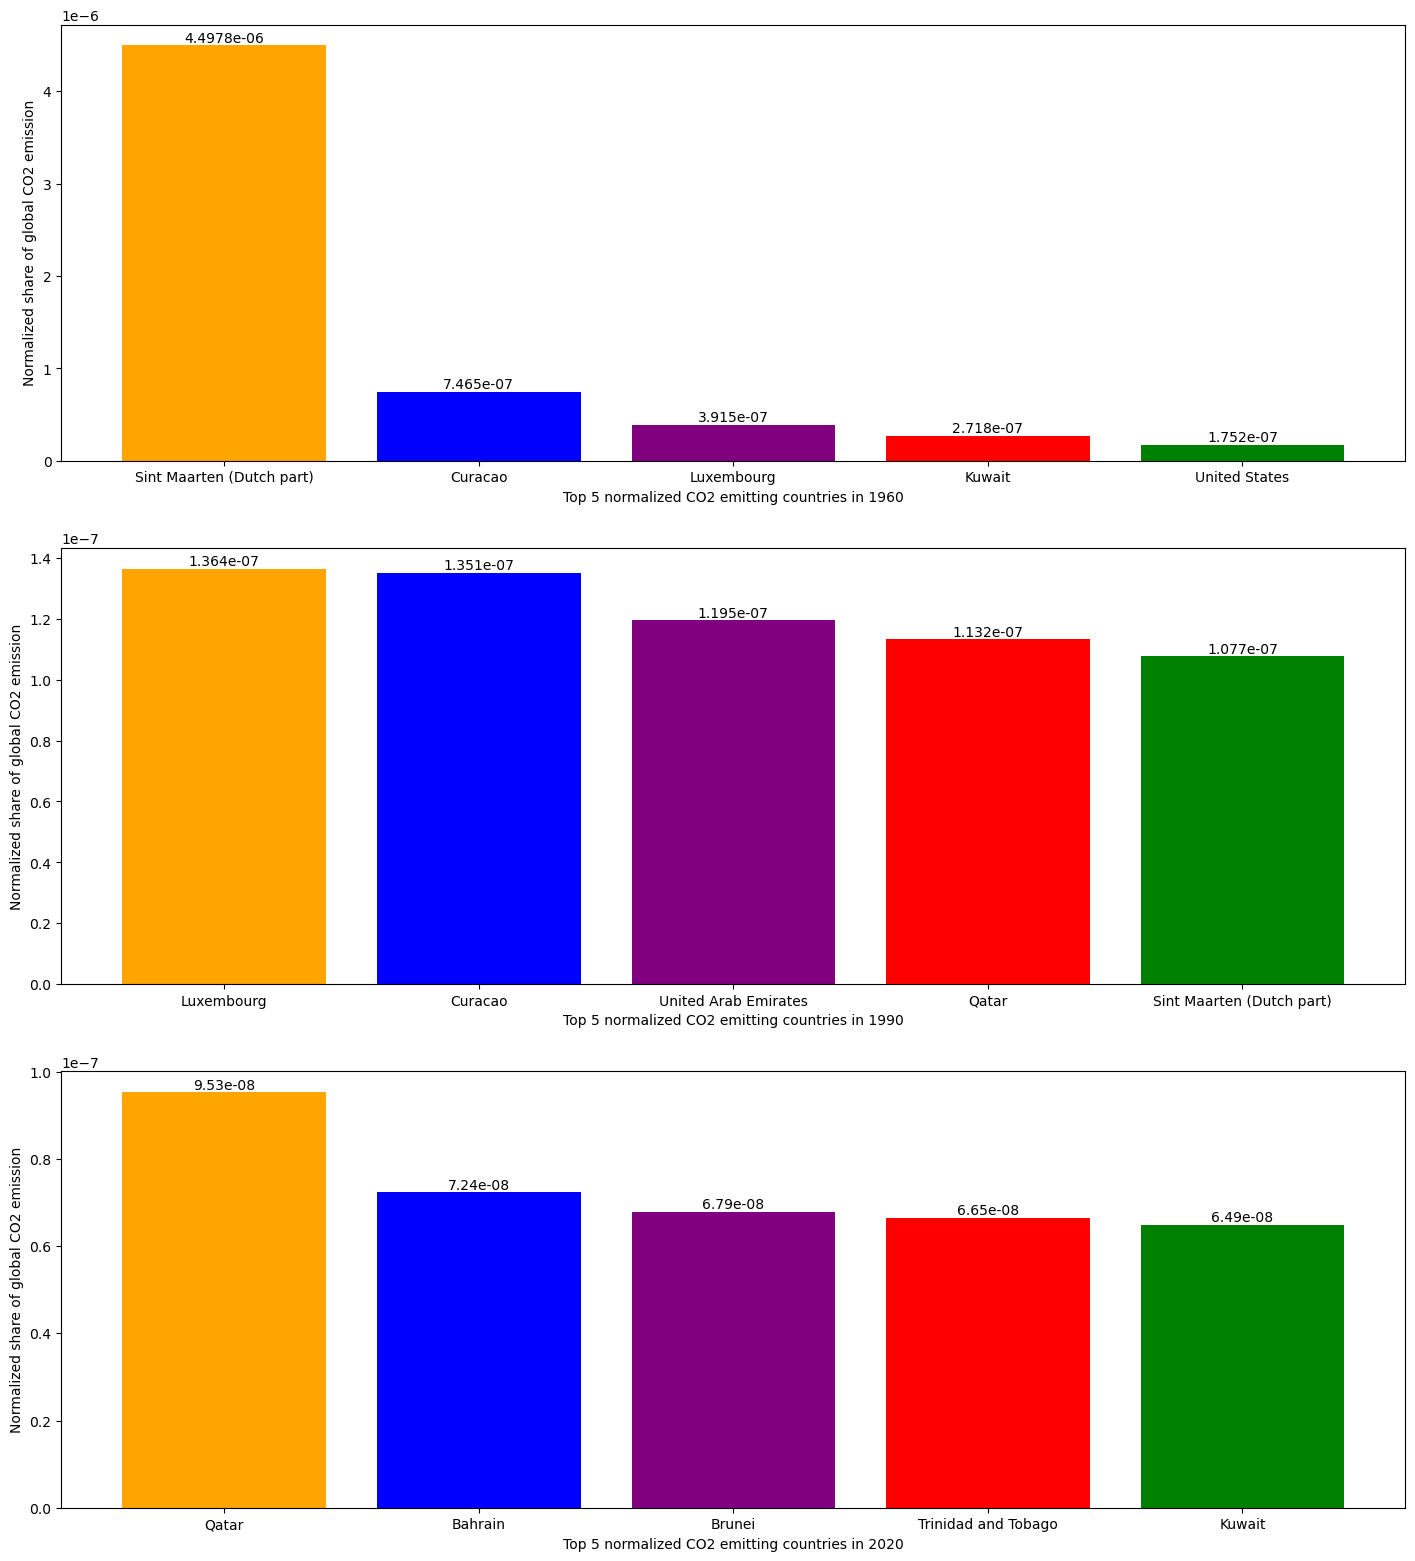

In [77]:
df_1960['share_global_co2_normalized'] = df_1960['share_global_co2']/df_1960['population']
df_1960['share_global_co2_normalized'] = df_1960['share_global_co2_normalized'].round(10)
df_1960 = df_1960.sort_values('share_global_co2_normalized',ascending=False)
df_1990['share_global_co2_normalized'] = df_1990['share_global_co2']/df_1990['population']
df_1990['share_global_co2_normalized'] = df_1990['share_global_co2_normalized'].round(10)
df_1990 = df_1990.sort_values('share_global_co2_normalized',ascending=False)
df_2020['share_global_co2_normalized'] = df_2020['share_global_co2']/df_2020['population']
df_2020['share_global_co2_normalized'] = df_2020['share_global_co2_normalized'].round(10)
df_2020 = df_2020.sort_values('share_global_co2_normalized',ascending=False)

#1960-plot
color = ['orange', 'blue', 'purple', 'red', 'green']
plt.subplot(3,1,1)
plt.bar(df_1960.iloc[0:5]['country'],df_1960.iloc[0:5]['share_global_co2_normalized'],color = color)
for i in range(5):
    plt.text(df_1960.iloc[i]['country'],df_1960.iloc[i]['share_global_co2_normalized'],df_1960.iloc[i]['share_global_co2_normalized'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 normalized CO2 emitting countries in 1960')
plt.ylabel('Normalized share of global CO2 emission')


#1990-plot
plt.subplot(3,1,2)
plt.bar(df_1990.iloc[0:5]['country'],df_1990.iloc[0:5]['share_global_co2_normalized'],color = color)
for i in range(5):
    plt.text(df_1990.iloc[i]['country'],df_1990.iloc[i]['share_global_co2_normalized'],df_1990.iloc[i]['share_global_co2_normalized'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 normalized CO2 emitting countries in 1990')
plt.ylabel('Normalized share of global CO2 emission')

#2020-plot
plt.subplot(3,1,3)
plt.bar(df_2020.iloc[0:5]['country'],df_2020.iloc[0:5]['share_global_co2_normalized'],color = color)
for i in range(5):
    plt.text(df_2020.iloc[i]['country'],df_2020.iloc[i]['share_global_co2_normalized'],df_2020.iloc[i]['share_global_co2_normalized'],ha = 'center',va = 'bottom')
plt.xlabel('Top 5 normalized CO2 emitting countries in 2020')
plt.ylabel('Normalized share of global CO2 emission')
plt.subplots_adjust(left=1, bottom=0.01, right=3.1, top=3.1)
plt.show()

## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country. Design your plot so that the population of the country can also be seen. Compare these plots for the year 1980 and 2020.  Comment on the relationship between GDP and per capita CO<sub>2</sub> emissions in each year. Has this relationship changed over time?

(Add your solution below. Add further markdown and code cells as needed.)

In [11]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.


## Q4. The development of wealth inequality over time.

*Has the distribution of wealth across countries become more or less equal over time?*

Make a plot that compares the distribution of GDP per capita across the countries in the world and 10-yearly intervals from 1950 to 2020.  Comment on how the distribution has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

In [6]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.


## Reminder

Before submitting your notebook make sure that it runs correctly from the beginning by selecting "Restart and run all" from the Kernel menu. Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.